#                                           Lead Score - Case Study

## Problem Statement
An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Goals and Objectives
#### There are quite a few goals for this case study.

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

# Importing Libraries and Data set

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
ls=pd.read_csv('Leads.csv')

In [4]:
ls.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Data description

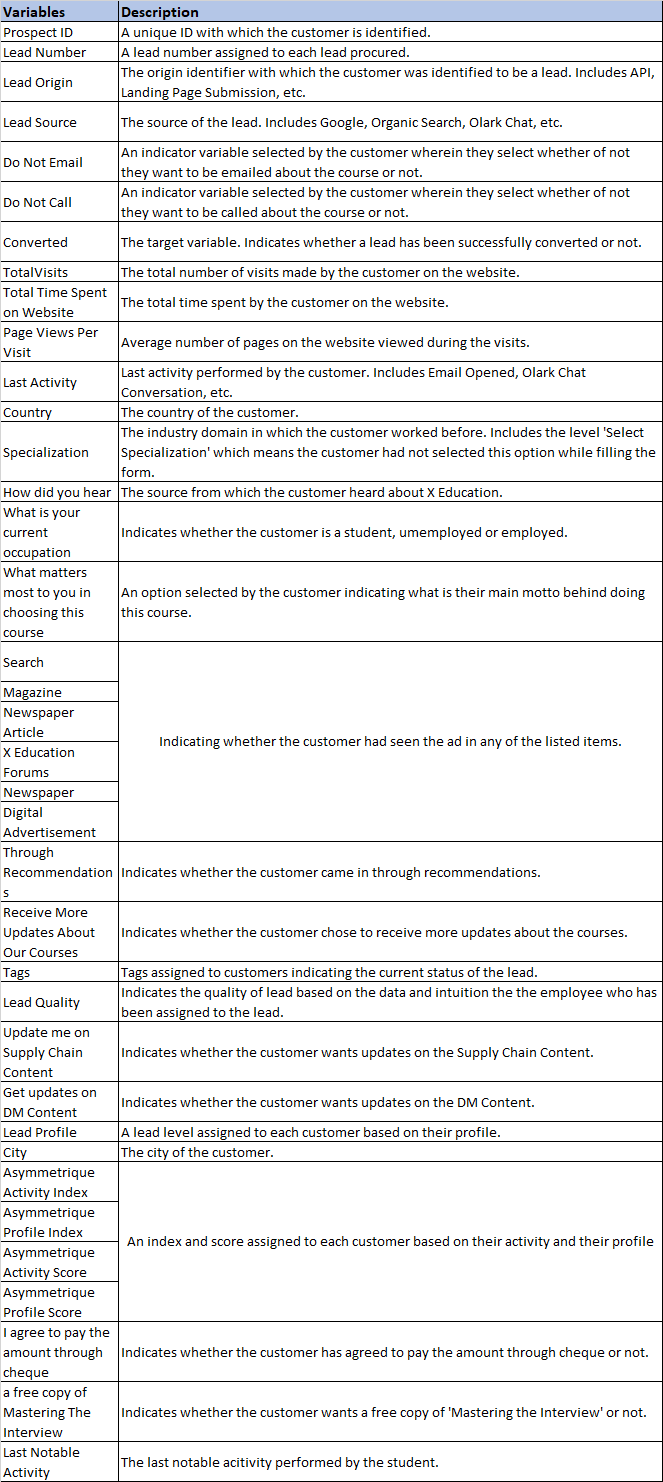

# Data Understanding & Cleaning

In [5]:
ls.shape

(9240, 37)

In [6]:
ls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
ls.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
ls.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
ls['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [10]:
ls.isna().sum().sort_values()

Prospect ID                                         0
I agree to pay the amount through cheque            0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
X Education Forums                                  0
A free copy of Mastering The Interview              0
Magazine                                            0
Search                                              0
Newspaper Article                                   0
Last Notable Activity                               0
Lead Number                                         0
Lead Origin                                         0
Total Time Spent on Website                         0
Converted                                           0
Do Not Call                 

As we can see there are number of columns containing high number of missing values. Hence these columns are not useful. Since, there are 9000 datapoints in our dataframe, let's drop the columns having greater than 3000 missing values.

In [11]:
for col in ls.columns:
    if ls[col].isnull().sum()>3000:
        ls.drop(col,axis=1, inplace=True)

In [12]:
ls.shape

(9240, 31)

As we can observe, the variables City and Country won't be of any use in our analysis. So it's best that we drop it.

In [13]:
ls.drop(['City'], axis = 1, inplace = True)
ls.drop(['Country'], axis = 1, inplace = True)

In [14]:
ls.isna().sum().sort_values()

Prospect ID                                         0
I agree to pay the amount through cheque            0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
X Education Forums                                  0
Newspaper Article                                   0
Magazine                                            0
Search                                              0
A free copy of Mastering The Interview              0
Last Notable Activity                               0
Total Time Spent on Website                         0
Converted                                           0
Do Not Call                                         0
Do Not Email                                        0
Lead Origin                 

In [15]:
ls.shape

(9240, 29)

Now recall that there are a few columns in which there is a level called 'Select' which basically means that the student had not selected the option for that particular column which is why it shows 'Select'. These values are as good as missing values and hence we need to identify the value counts of the level 'Select' in all the columns that it is present.

In [16]:
# Get the value counts of all the columns

for column in ls:
    print(column,'\n','-----------------------')
    print(ls[column].astype('category').value_counts())
    print('\n','***********************************************','\n')

Prospect ID 
 -----------------------
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64

 *********************************************** 

Lead Number 
 -----------------------
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64

 *********************************************** 

Lead Origin 
 -----------------------
Landing Page Submission    4886
API                        3580
Lead Add Form               718


Clearly the levels Lead Profile and How did you hear about X Education have a lot of rows which have the value Select which is of no use to the analysis so it's best that we drop them.

In [17]:
ls.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

Also notice that when we got the value counts of all the columns, there were a few columns in which only one value was majorly present for all the data points. These include `Do Not Call`, `Search`, `Magazine`, `Newspaper Article`, `X Education Forums`, `Newspaper`, `Digital Advertisement`, `Through Recommendations`, `Receive More Updates About Our Courses`, `Update me on Supply Chain Content`, `Get updates on DM Content`, `I agree to pay the amount through cheque`. Since practically all of the values for these variables are `No`, it's best that we drop these columns as they won't help with our analysis.

In [18]:
ls.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [19]:
ls.shape

(9240, 15)

In [20]:
ls['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

Also, the variable `What matters most to you in choosing a course` has the level `Better Career Prospects` `6528` times while the other two levels appear once twice and once respectively. So we should drop this column as well.

In [21]:
# Drop the null value rows present in the variable 'What matters most to you in choosing a course'

ls.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [22]:
# Check the number of null values again

ls.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

Now, there's the column `What is your current occupation` which has a lot of null values. Now we will treat null values by droping the rows which contain null values.

In [23]:
ls = ls[~pd.isnull(ls['What is your current occupation'])]

In [24]:
# Check the number of null values again

ls.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                36
Do Not Email                                0
Converted                                   0
TotalVisits                               130
Total Time Spent on Website                 0
Page Views Per Visit                      130
Last Activity                             103
Specialization                             18
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

Since now the number of null values present in the columns are quite small we can simply drop the rows in which these null values are present.

In [25]:
# Drop the null value rows in the column 'TotalVisits'

ls = ls[~pd.isnull(ls['TotalVisits'])]

In [26]:
# Check the null values again

ls.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                               29
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [27]:
# Drop the null values rows in the column 'Lead Source'

ls = ls[~pd.isnull(ls['Lead Source'])]

In [28]:
# Check the number of null values again

ls.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [29]:
# Drop the null values rows in the column 'Specialization'

ls = ls[~pd.isnull(ls['Specialization'])]

In [30]:
# Check the number of null values again

ls.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

Now our data doesn't have any null values. Let's now check the percentage of rows that we have retained.

In [31]:
ls.shape

(6373, 14)

In [32]:
print(len(ls.index))
print(len(ls.index)/9240)

6373
0.6897186147186147


We still have around 69% of the rows which seems good enough.

In [33]:
ls.head().T

,0,1,2,3,4
Prospect ID,7927b2df-8bba-4d29-b9a2-b6e0beafe620,2a272436-5132-4136-86fa-dcc88c88f482,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,3256f628-e534-4826-9d63-4a8b88782852
Lead Number,660737,660728,660727,660719,660681
Lead Origin,API,API,Landing Page Submission,Landing Page Submission,Landing Page Submission
Lead Source,Olark Chat,Organic Search,Direct Traffic,Direct Traffic,Google
Do Not Email,No,No,No,No,No
Converted,0,0,1,0,1
TotalVisits,0.0,5.0,2.0,1.0,2.0
Total Time Spent on Website,0,674,1532,305,1428
Page Views Per Visit,0.0,2.5,2.0,1.0,1.0
Last Activity,Page Visited on Website,Email Opened,Email Opened,Unreachable,Converted to Lead


Now, clearly the variables `Prospect ID` and `Lead Number` won't be of any use in the analysis, so it's best that we drop these two variables.

In [34]:
ls.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [35]:
ls.shape

(6373, 12)

# EDA

## Univariate Analysis

### Categorical Variables

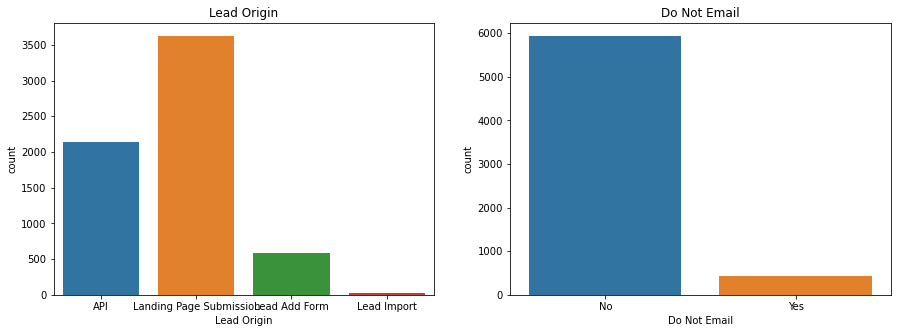

In [36]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(ls['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(ls['Do Not Email'])
plt.title('Do Not Email')

plt.show()

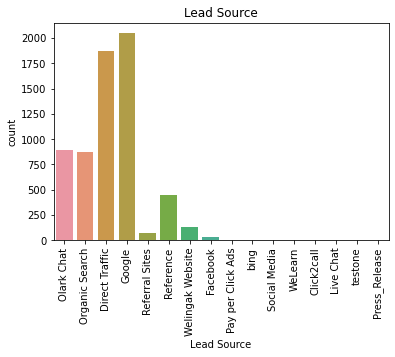

In [37]:
sns.countplot(ls['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

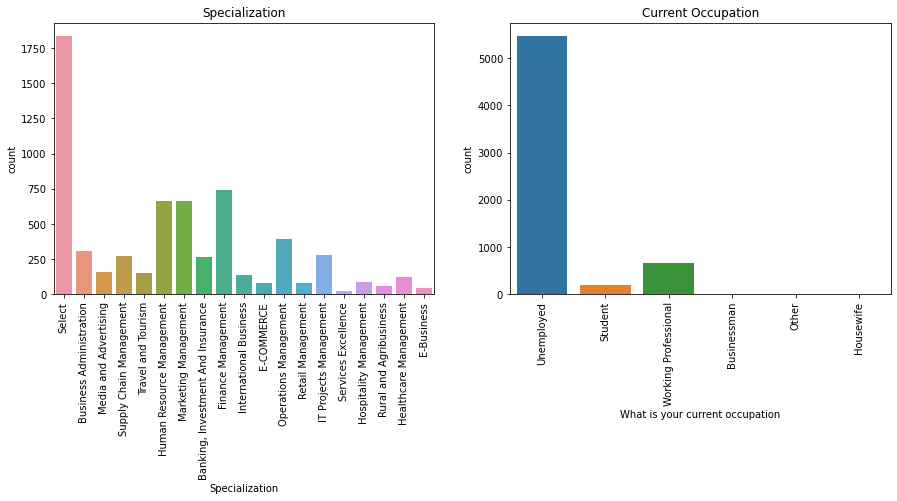

In [38]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.countplot(ls['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.subplot(1,2,2)
sns.countplot(ls['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.show()

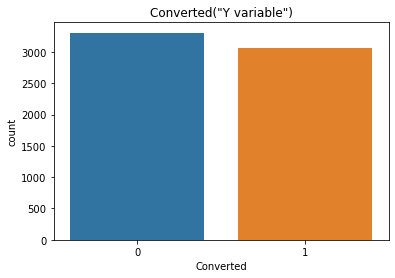

In [39]:
sns.countplot(ls['Converted'])
plt.title('Converted("Y variable")')
plt.show()

###  Numerical Variables

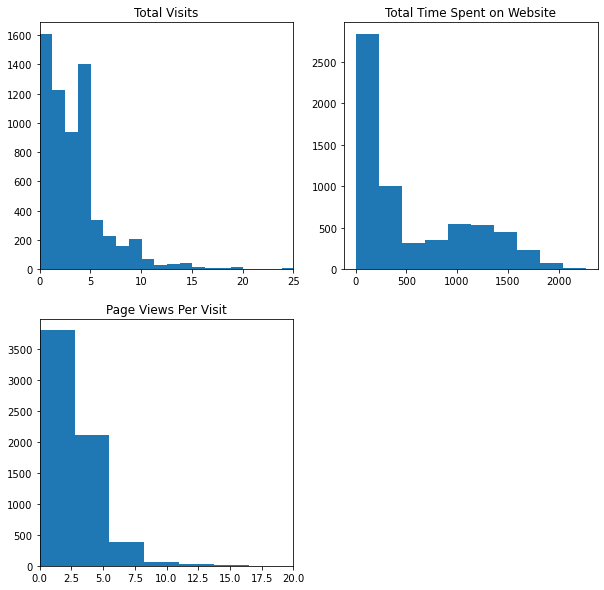

In [40]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(ls['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(ls['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(ls['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

## Bivariate analysis

### Relating all the categorical variables to Converted

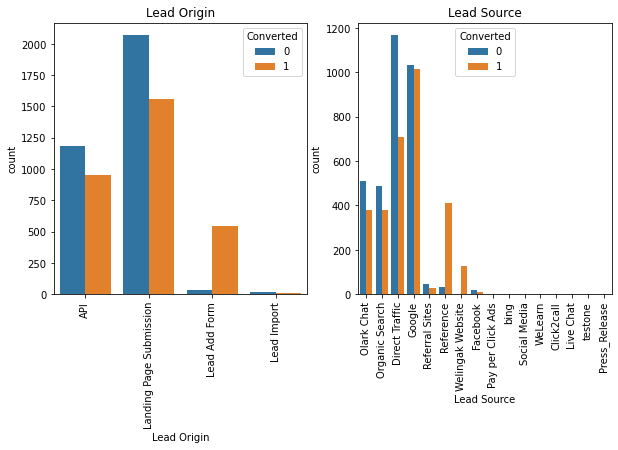

In [41]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= ls).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= ls).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

Text(0.5, 1.0, 'Do Not Email')

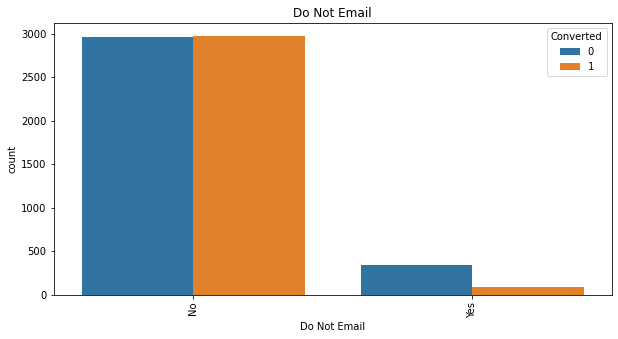

In [42]:
plt.figure(figsize = (10,5))

plt.subplot(1,1,1)
sns.countplot(x='Do Not Email', hue='Converted', data= ls).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

Text(0.5, 1.0, 'Last Activity')

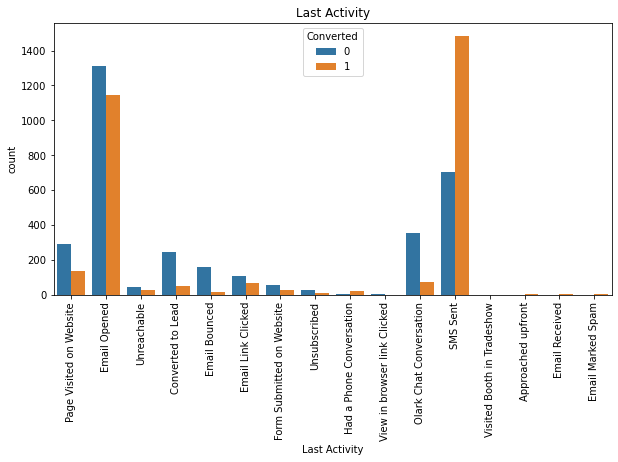

In [43]:
plt.figure(figsize = (10,5))

plt.subplot(1,1,1)
sns.countplot(x='Last Activity', hue='Converted', data= ls).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

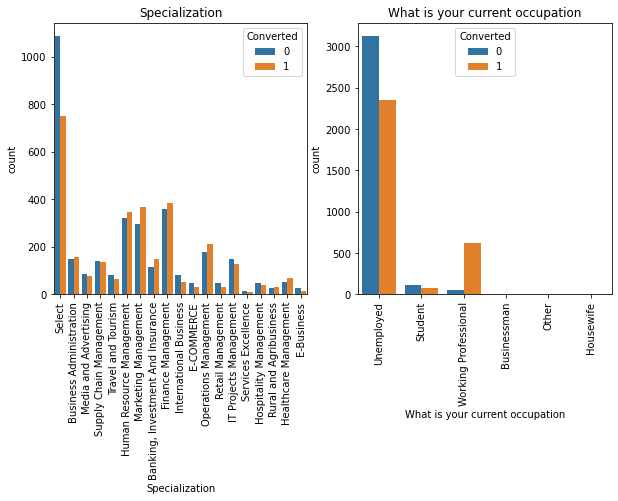

In [44]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= ls).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= ls).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

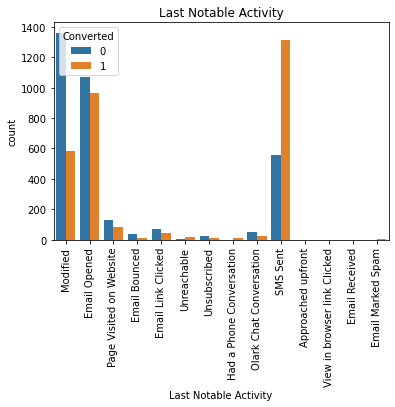

In [45]:
sns.countplot(x='Last Notable Activity', hue='Converted', data= ls).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

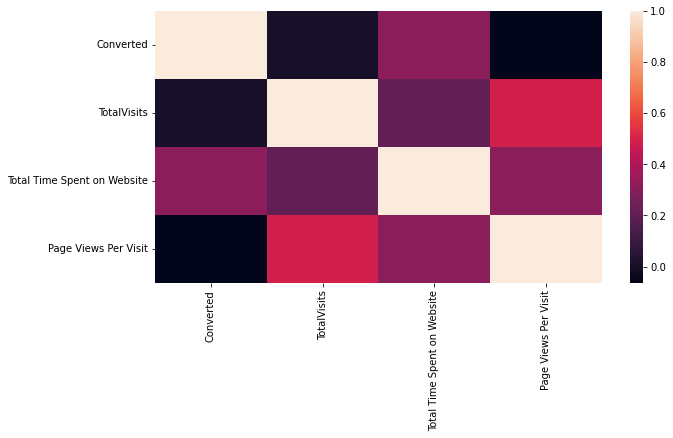

In [46]:
# To check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(ls.corr())
plt.show()

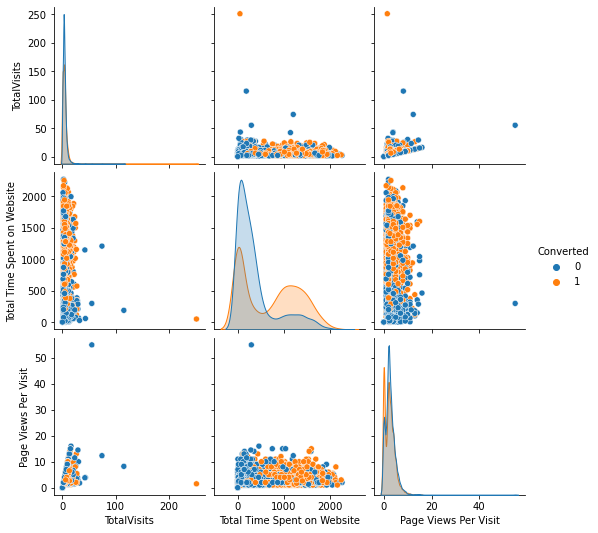

In [47]:
sns.pairplot(ls,diag_kind='kde',hue='Converted')
plt.show()

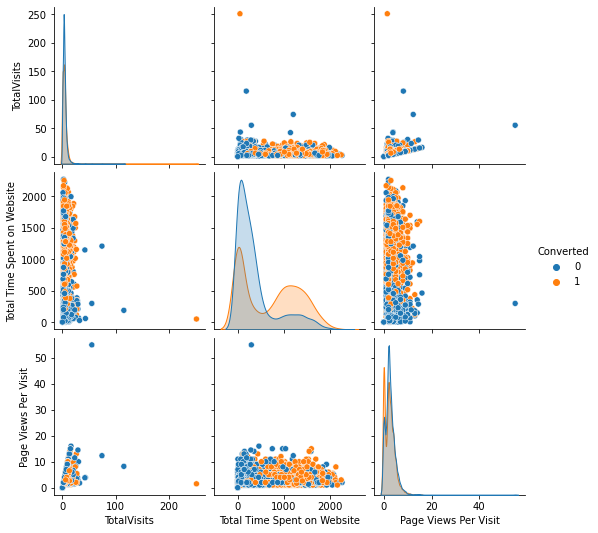

In [48]:
xedu = ls[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
sns.pairplot(xedu,diag_kind='kde',hue='Converted')
plt.show()

In [49]:
ls['Converted'].value_counts()

0    3308
1    3065
Name: Converted, dtype: int64

In [50]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
transformedxedu = pd.DataFrame(pt.fit_transform(xedu))
transformedxedu.columns = xedu.columns
transformedxedu.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted
0,-1.539988,-1.532509,-1.534722,-0.962570
1,0.690854,0.641870,0.230818,-0.962570
2,-0.219742,1.262512,-0.019004,1.038885
3,-0.723932,0.153656,-0.629842,-0.962570
4,-0.219742,1.204175,-0.629842,1.038885


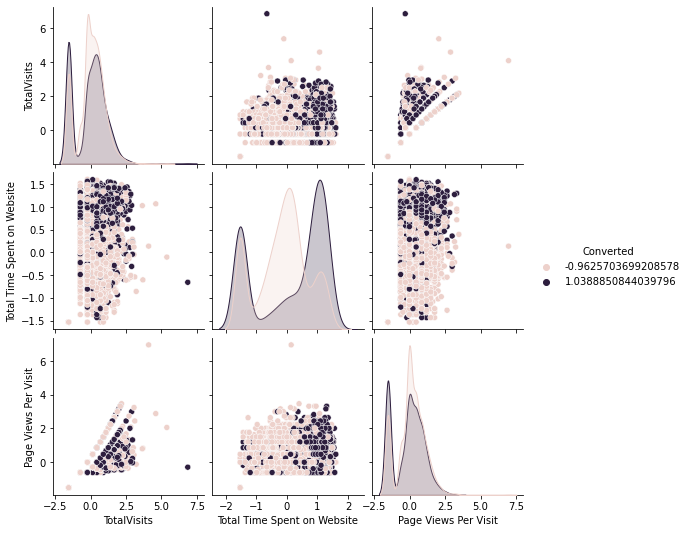

In [51]:
sns.pairplot(transformedxedu,diag_kind='kde',hue='Converted',)
plt.show()

# Dummy variable creation

Dummy Variable Creation for categorical columns which are having more than two variables.

In [52]:
# Check the columns which are of type 'object'

cat_cols = ls.loc[:, ls.dtypes == 'object']
cat_cols.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [53]:
cat_cols=['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity']

In [54]:
ls[cat_cols].nunique()

Lead Origin                                4
Lead Source                               16
Do Not Email                               2
Last Activity                             16
Specialization                            19
What is your current occupation            6
A free copy of Mastering The Interview     2
Last Notable Activity                     14
dtype: int64

In [55]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(ls[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
ls = pd.concat([ls, dummy], axis=1)

In [56]:
# Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select' which is useless so we
# drop that level by specifying it explicitly

dummy_spl = pd.get_dummies(ls['Specialization'], prefix = 'Specialization')
dummy_spl = dummy_spl.drop(['Specialization_Select'], 1)
ls = pd.concat([ls, dummy_spl], axis = 1)

In [57]:
# Drop the variables for which the dummy variables have been created

ls = ls.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [58]:
ls.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [59]:
ls.shape

(6373, 75)

# Splitting the Data into Training and Testing Sets

In [60]:
# Import the required library
from sklearn.model_selection import train_test_split

In [61]:
# Put all the feature variables in X
X = ls.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
# Put the target variable in y
y = ls['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [63]:
# Split the dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Rescaling the Feactures using MinMax Scaling

In [64]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler

In [65]:
# Scale the three numeric features present in the dataset
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0.015936,0.029489,0.125,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
218,0.015936,0.082306,0.250,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4171,0.023904,0.034331,0.375,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4037,0.000000,0.000000,0.000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3660,0.000000,0.000000,0.000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
X_train.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
count,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,...,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000
mean,0.014528,0.234426,0.153604,0.564672,0.094149,0.003587,0.290069,0.003587,0.320108,0.000448,...,0.044385,0.023089,0.104237,0.023313,0.058507,0.014571,0.008742,0.002690,0.040126,0.022192
std,0.021712,0.248618,0.127910,0.495856,0.292069,0.059788,0.453845,0.059788,0.466570,0.021171,...,0.205971,0.150203,0.305602,0.150913,0.234726,0.119840,0.093102,0.051801,0.196276,0.147325
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.003984,0.014525,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.011952,0.125440,0.125000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.019920,0.448504,0.229375,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Let's now look at the correlations between the variables.

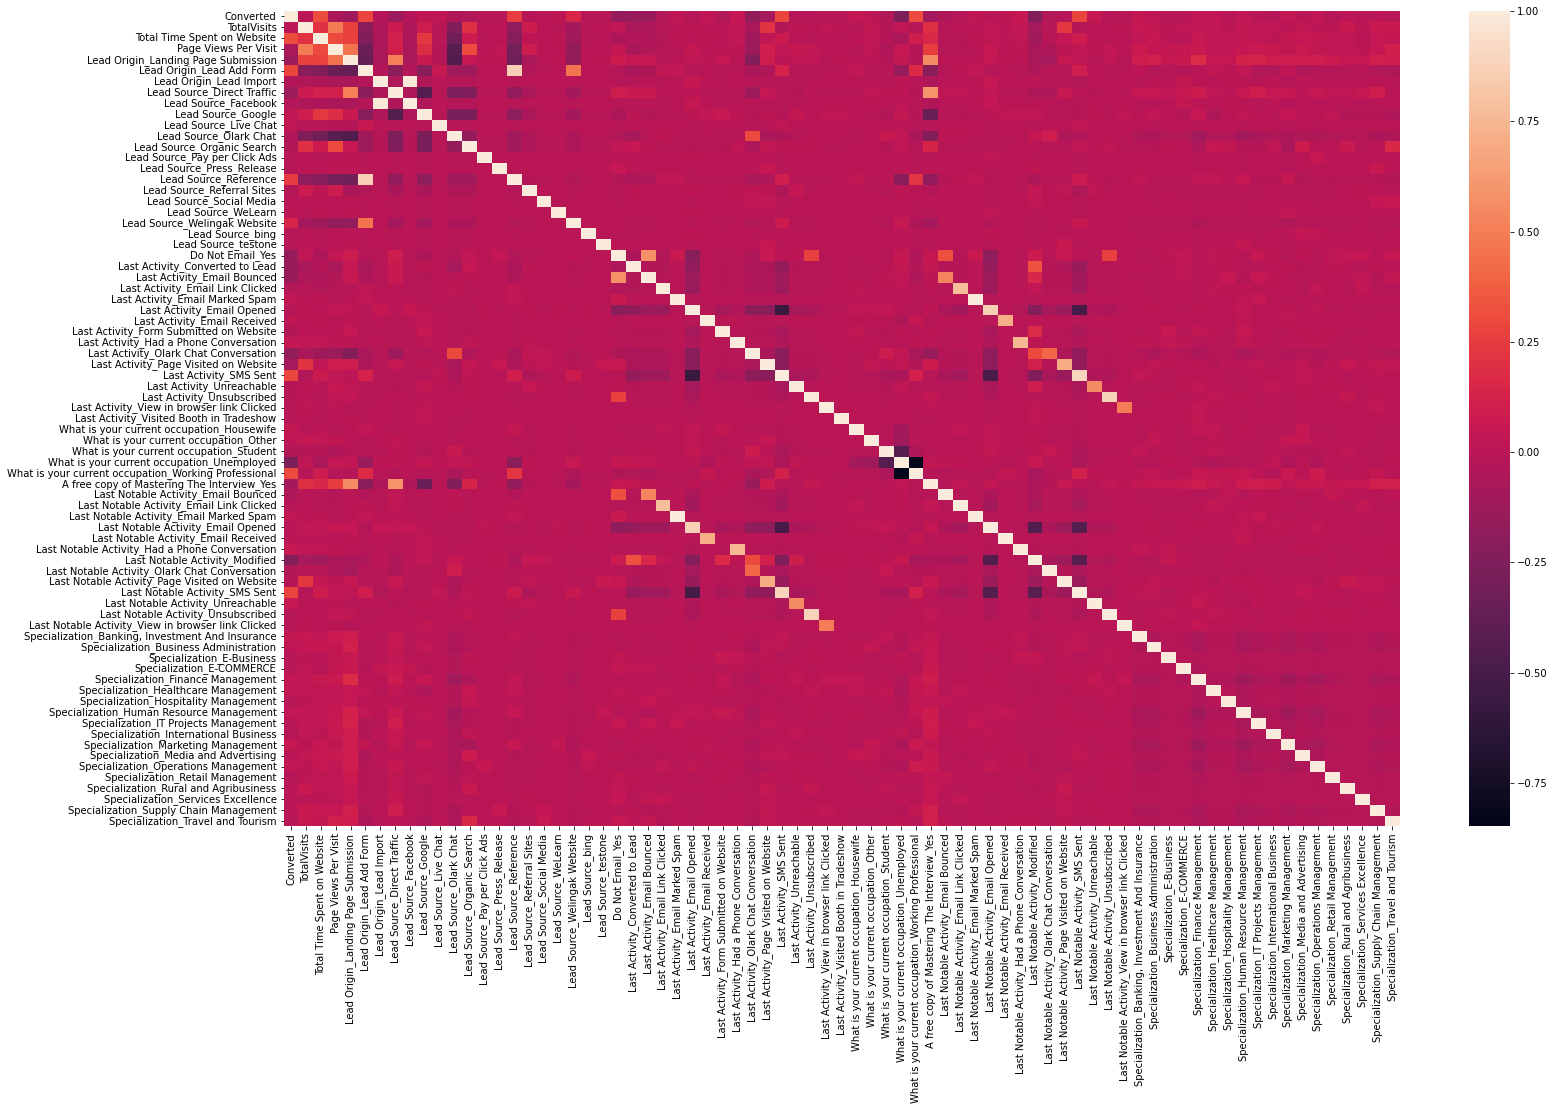

In [67]:
# Looking at the correlation table
plt.figure(figsize = (25,15))
sns.heatmap(ls.corr())
plt.show()

# Building a Logistic Model

### Feature Selection

In [68]:
# Import 'LogisticRegression' and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [69]:
# Import RFE and select 15 variables
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [70]:
# Let's take a look at which features have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 23),
 ('Lead Origin_Landing Page Submission', False, 8),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 52),
 ('Lead Source_Direct Traffic', False, 24),
 ('Lead Source_Facebook', False, 51),
 ('Lead Source_Google', False, 36),
 ('Lead Source_Live Chat', False, 44),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Pay per Click Ads', False, 43),
 ('Lead Source_Press_Release', False, 53),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 37),
 ('Lead Source_Social Media', False, 58),
 ('Lead Source_WeLearn', False, 42),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 33),
 ('Lead Source_testone', False, 38),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 25),
 ('Last Activity_Email Bounced', False, 4),
 ('Last Activity_Email Link C

In [71]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [72]:
# Select only the columns selected by RFE
X_train = X_train[col]

In [73]:
# Import statsmodels
import statsmodels.api as sm

## 1st Model

In [74]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2072.8
Date:                Tue, 13 Sep 2022   Deviance:                       4145.5
Time:                        18:10:38   Pearson chi2:                 4.84e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0061      0.600     -1.677      0.094      -2.182       0.170
TotalVisits                                             11.3439      2.682      4.230      0.000       6.088      16.600
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                2.9483      1.191      2.475      0.013       0.614       5.283
Lead Source_Olark Chat                                   1.4584      0.122     11.962      0.000       1.219       1.697
Lead Source_Reference                                    1.2994      1.214      1.070      0.285      -1.080       3.679
Lead Source_Welingak Website                             3.4159      1.558      2.192      0.028       0.362       6.470
Do Not Email_Yes                                        -1.5053      0.193     -7.781      0.000      -1.884      -1.126
Last Activity_Had a Phone Conversation                   1.0397      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6492   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1544      0.630     -1.831      0.067      -2.390       0.081
What is your current occupation_Unemployed              -1.3395      0.594     -2.254      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1932   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7868      0.807      3.453      0.001       1.205       4.369
========================================================================================================================
"""

There are quite a few variable which have a p-value greater than `0.05`. We will need to take care of them. But first, let's also look at the VIFs.

In [75]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [76]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,84.19
4,Lead Source_Reference,65.18
5,Lead Source_Welingak Website,20.03
11,What is your current occupation_Unemployed,3.65
7,Last Activity_Had a Phone Conversation,2.44
13,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.38
0,TotalVisits,1.62
8,Last Activity_SMS Sent,1.59
12,What is your current occupation_Working Profes...,1.56


VIFs seem to be in a decent range except for three variables. 

Let's first drop the variable `Lead Source_Reference` since it has a high p-value as well as a high VIF.

## 2nd Model

In [77]:
# Dropping 'Lead Source_Reference'
X_train.drop('Lead Source_Reference', axis = 1, inplace = True)

In [78]:
# Refit the model with the new set of features
logm2 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
print(logm2.fit().summary())

# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2073.2
Date:                Tue, 13 Sep 2022   Deviance:                       4146.5
Time:                        18:10:39   Pearson chi2:                 4.82e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
10,What is your current occupation_Unemployed,3.65
6,Last Activity_Had a Phone Conversation,2.44
12,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.38
2,Lead Origin_Lead Add Form,1.71
0,TotalVisits,1.62
7,Last Activity_SMS Sent,1.59
11,What is your current occupation_Working Profes...,1.56
3,Lead Source_Olark Chat,1.44
4,Lead Source_Welingak Website,1.33


The VIFs are now all less than 5. So let's drop the ones with the high p-values beginning with `Last Notable Activity_Had a Phone Conversation`.

## 3rd Model

In [79]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [80]:
# Refit the model with the new set of features
logm3 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
print(logm3.fit().summary())

# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2076.1
Date:                Tue, 13 Sep 2022   Deviance:                       4152.2
Time:                        18:10:39   Pearson chi2:                 4.82e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
10,What is your current occupation_Unemployed,3.65
1,Total Time Spent on Website,2.38
2,Lead Origin_Lead Add Form,1.71
0,TotalVisits,1.62
7,Last Activity_SMS Sent,1.59
11,What is your current occupation_Working Profes...,1.56
3,Lead Source_Olark Chat,1.44
4,Lead Source_Welingak Website,1.33
5,Do Not Email_Yes,1.09
9,What is your current occupation_Student,1.09


Drop `What is your current occupation_Housewife`.

## 4th Model

In [81]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [82]:
# Refit the model with the new set of features
logm4 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
print(logm4.fit().summary())

# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2078.3
Date:                Tue, 13 Sep 2022   Deviance:                       4156.7
Time:                        18:10:39   Pearson chi2:                 4.83e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
9,What is your current occupation_Unemployed,3.64
1,Total Time Spent on Website,2.37
2,Lead Origin_Lead Add Form,1.70
0,TotalVisits,1.62
7,Last Activity_SMS Sent,1.59
10,What is your current occupation_Working Profes...,1.56
3,Lead Source_Olark Chat,1.44
4,Lead Source_Welingak Website,1.33
5,Do Not Email_Yes,1.09
8,What is your current occupation_Student,1.09


Drop `What is your current occupation_Working Professional`.

## 5th Model

In [83]:
X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)

In [84]:
# Refit the model with the new set of features
logm5 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
print(logm5.fit().summary())

# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif          

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2079.1
Date:                Tue, 13 Sep 2022   Deviance:                       4158.1
Time:                        18:10:40   Pearson chi2:                 4.80e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

,Features,VIF
9,What is your current occupation_Unemployed,2.82
1,Total Time Spent on Website,2.00
0,TotalVisits,1.54
7,Last Activity_SMS Sent,1.51
2,Lead Origin_Lead Add Form,1.45
3,Lead Source_Olark Chat,1.33
4,Lead Source_Welingak Website,1.30
5,Do Not Email_Yes,1.08
8,What is your current occupation_Student,1.06
6,Last Activity_Had a Phone Conversation,1.01


Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

# Model Evaluation

In [85]:
# Use 'predict' to predict the probabilities on the train set
y_train_pred = (logm5.fit()).predict(sm.add_constant(X_train))
y_train_pred[:10]

8003    0.300117
218     0.142002
4171    0.127629
4037    0.291558
3660    0.954795
207     0.194426
2044    0.178073
6411    0.949460
6498    0.075995
2085    0.982316
dtype: float64

In [86]:
# Reshaping it into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.30011695, 0.14200165, 0.12762885, 0.29155814, 0.95479546,
       0.19442563, 0.17807328, 0.94946006, 0.07599465, 0.98231619])

#### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [87]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.300117
1,0,0.142002
2,1,0.127629
3,1,0.291558
4,1,0.954795


#### Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [88]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.300117,0
1,0,0.142002,0
2,1,0.127629,0
3,1,0.291558,0
4,1,0.954795,1


Now that we have the probabilities and have also made conversion predictions using them, it's time to evaluate the model.

In [89]:
# Import metrics from sklearn for evaluation
from sklearn import metrics

In [90]:
# Create confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1929  383]
 [ 560 1589]]


In [91]:
# Let's check the overall accuracy
accuracy=metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print('accuracy: ',accuracy)

accuracy:  0.7886124187401928


In [92]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [93]:
# Calculate the sensitivity
sensitivity= TP/(TP+FN)
print('sensitivity: ', sensitivity)

sensitivity:  0.739413680781759


In [94]:
# Calculate the specificity
specificity=TN/(TN+FP)
print('specificity: ',  specificity)

specificity:  0.8343425605536332


## Finding the Optimal Cutoff

Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, we need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [95]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [96]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

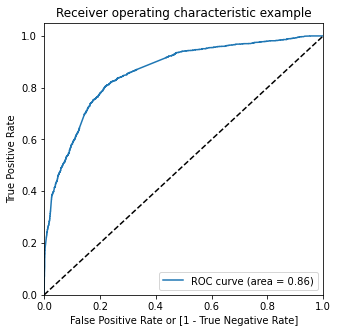

In [97]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.86 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [98]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.300117,0,1,1,1,1,0,0,0,0,0,0
1,0,0.142002,0,1,1,0,0,0,0,0,0,0,0
2,1,0.127629,0,1,1,0,0,0,0,0,0,0,0
3,1,0.291558,0,1,1,1,0,0,0,0,0,0,0
4,1,0.954795,1,1,1,1,1,1,1,1,1,1,1


In [99]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.527012  0.994416  0.092561
0.2   0.2  0.698274  0.944160  0.469723
0.3   0.3  0.767541  0.865984  0.676038
0.4   0.4  0.791975  0.810610  0.774654
0.5   0.5  0.788612  0.739414  0.834343
0.6   0.6  0.757229  0.624011  0.881055
0.7   0.7  0.735037  0.543509  0.913062
0.8   0.8  0.711500  0.453234  0.951557
0.9   0.9  0.644026  0.279665  0.982699


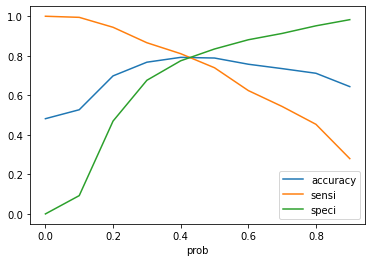

In [100]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As you can see that around 0.42, you get the optimal values of the three metrics. So let's choose 0.42 as our cutoff now.

In [101]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.300117,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.142002,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.127629,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.291558,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.954795,1,1,1,1,1,1,1,1,1,1,1,1


In [102]:
# Let's check the accuracy now
accuracy=metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
print('accuracy: ',accuracy)

accuracy:  0.7908540685944856


In [103]:
# Let's create the confusion matrix once again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1823,  489],
       [ 444, 1705]], dtype=int64)

In [104]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [105]:
# Calculate Sensitivity
Sensitivity=TP/(TP+FN)
print('Sensitivity: ', Sensitivity)

Sensitivity:  0.793392275476966


In [106]:
# Calculate Specificity
Specificity=TN/(TN+FP)
print('Specificity: ',Specificity)

Specificity:  0.7884948096885813


Cutoff point is optimum

# Making Predictions on the Test Set

In [107]:
# Scale the test set as well using just 'transform'
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [108]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,0.000000,0.000000,1,0,1,0,0,0,1,0,0,0,1,0,0
6122,0.027888,0.029049,0,0,0,0,0,0,0,0,0,1,0,0,0
9202,0.015936,0.416813,0,0,0,0,0,0,1,0,0,1,0,0,0
6570,0.011952,0.378961,0,0,0,0,1,0,1,0,0,1,0,0,0
2668,0.031873,0.395246,0,0,0,0,0,0,1,0,0,1,0,0,0


In [109]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])

In [110]:
# Check X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,1.0,0.000000,0.000000,1,0,1,0,0,0,1,0,0,0,1,0,0
6122,1.0,0.027888,0.029049,0,0,0,0,0,0,0,0,0,1,0,0,0
9202,1.0,0.015936,0.416813,0,0,0,0,0,0,1,0,0,1,0,0,0
6570,1.0,0.011952,0.378961,0,0,0,0,1,0,1,0,0,1,0,0,0
2668,1.0,0.031873,0.395246,0,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5828,1.0,0.011952,0.027289,0,0,0,0,0,0,1,0,0,1,0,0,0
6583,1.0,0.011952,0.152289,0,0,0,0,0,0,1,0,0,1,0,0,0
5531,1.0,0.055777,0.702025,0,0,0,0,0,0,0,0,0,1,0,0,0
3056,1.0,0.011952,0.417694,0,0,0,0,1,0,1,0,0,1,0,0,0


In [111]:
# Drop the required columns from X_test as well
X_test.drop(['Lead Source_Reference', 'What is your current occupation_Housewife', 
             'What is your current occupation_Working Professional', 'Last Notable Activity_Had a Phone Conversation'], 1, inplace = True)

In [112]:
# Make predictions on the test set and store it in the variable 'y_test_pred'
y_test_pred = (logm5.fit()).predict(sm.add_constant(X_test))

In [113]:
y_test_pred[:10]

4771    0.996296
6122    0.129992
9202    0.703937
6570    0.299564
2668    0.720796
4233    0.792250
3368    0.704038
9091    0.464521
5972    0.282978
3631    0.786460
dtype: float64

In [114]:
# Converting y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)

In [115]:
# Let's see the head
y_pred_1.head()

,0
4771,0.996296
6122,0.129992
9202,0.703937
6570,0.299564
2668,0.720796


In [116]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [117]:
# Remove index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [118]:
# Append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [119]:
# Check 'y_pred_final'
y_pred_final.head()

,Converted,0
0,1,0.996296
1,0,0.129992
2,0,0.703937
3,1,0.299564
4,1,0.720796


In [120]:
# Rename the column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [121]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.996296
1,0,0.129992
2,0,0.703937
3,1,0.299564
4,1,0.720796


In [122]:
# Make predictions on the test set using 0.42 as the cutoff
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [123]:
# Check y_pred_final
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.996296,1
1,0,0.129992,0
2,0,0.703937,1
3,1,0.299564,0
4,1,0.720796,1


In [124]:
# Let's check the overall accuracy
accuracy=metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)
print('accuracy: ', accuracy)

accuracy:  0.7845188284518828


In [125]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[786, 210],
       [202, 714]], dtype=int64)

In [126]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [127]:
# Calculate sensitivity
sensitivity=TP / float(TP+FN)
print('sensitivity: ',sensitivity)

sensitivity:  0.7794759825327511


In [128]:
# Calculate specificity
specificity=TN / float(TN+FP)
print('specificity: ',specificity)

specificity:  0.7891566265060241


## Precision-Recall View

Let's now also build the training model using the precision-recall view

In [129]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1929,  383],
       [ 560, 1589]], dtype=int64)

#### Precision = TP / TP + FP


In [130]:
Precision=confusion[1,1]/(confusion[0,1]+confusion[1,1])
print('Precision: ',Precision)

Precision:  0.8057809330628803


#### Recall = TP / TP + FN

In [131]:
Recall= confusion[1,1]/(confusion[1,0]+confusion[1,1])
print('Recall: ',Recall)

Recall:  0.739413680781759


## Precision and recall tradeoff

In [132]:
from sklearn.metrics import precision_recall_curve

In [133]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4456    1
 4457    0
 4458    0
 4459    0
 4460    0
 Name: Converted, Length: 4461, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 4456    1
 4457    1
 4458    1
 4459    0
 4460    0
 Name: Predicted, Length: 4461, dtype: int64)

In [134]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

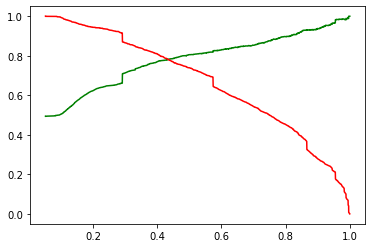

In [135]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [136]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.300117,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.142002,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.127629,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.291558,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.954795,1,1,1,1,1,1,1,1,1,1,1,1


In [137]:
# Let's check the accuracy now
accuracy=metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
print('accuracy: ',accuracy)

accuracy:  0.7908540685944856


In [138]:
# Let's create the confusion matrix once again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1823,  489],
       [ 444, 1705]], dtype=int64)

In [139]:
# Let's evaluate the other metrics as well
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [140]:
# Calculate Precision
Precision=TP/(TP+FP)
print('Precision: ',Precision)

Precision:  0.7771194165907019


In [141]:
# Calculate Recall
Recall=TP/(TP+FN)
print('Recall: ',Recall)

Recall:  0.793392275476966


This cutoff point seems good to go

## Making Predictions on the Test Set

In [142]:
# Make predictions on the test set and store it in the variable 'y_test_pred'
y_test_pred = (logm5.fit()).predict(sm.add_constant(X_test))

In [143]:
y_test_pred[:10]

4771    0.996296
6122    0.129992
9202    0.703937
6570    0.299564
2668    0.720796
4233    0.792250
3368    0.704038
9091    0.464521
5972    0.282978
3631    0.786460
dtype: float64

In [144]:
# Converting y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)

In [145]:
# Let's see the head
y_pred_1.head()

,0
4771,0.996296
6122,0.129992
9202,0.703937
6570,0.299564
2668,0.720796


In [146]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [147]:
# Remove index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [148]:
# Append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [149]:
# Check 'y_pred_final'
y_pred_final.head()

,Converted,0
0,1,0.996296
1,0,0.129992
2,0,0.703937
3,1,0.299564
4,1,0.720796


In [150]:
# Rename the column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [151]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.996296
1,0,0.129992
2,0,0.703937
3,1,0.299564
4,1,0.720796


In [152]:
# Make predictions on the test set using 0.42 as the cutoff
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [153]:
# Check y_pred_final
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.996296,1
1,0,0.129992,0
2,0,0.703937,1
3,1,0.299564,0
4,1,0.720796,1


In [154]:
# Let's check the overall accuracy
accuracy=metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)
print('accuracy: ',accuracy)

accuracy:  0.7845188284518828


In [155]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[786, 210],
       [202, 714]], dtype=int64)

In [156]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [157]:
# Calculate Precision
Precision=TP/(TP+FP)
print('Precision: ',Precision)

Precision:  0.7727272727272727


In [158]:
# Calculate Recall
Recall=TP/(TP+FN)
print('Recall: ',Recall)

Recall:  0.7794759825327511


 ___With the current cut off as 0.42 we have Precision around 77.27% and Recall around 77.94%___

# Conclusion
It was found that the variables that mattered the most in the potential buyers are (In descending order) :

1. Total number of visits.
2. The total time spend on the Website.
3. Lead Origin_Lead Add Form.
4. Last Notable Activity_Unreachable.
5. Last Activity_Had a Phone Conversation.
6. Lead Source_Welingak Website.
7. Lead Source_Olark Chat.
8. Last Activity_SMS Sent.
9. Do Not Email_Yes.
10. What is your current occupation_Student.
11. What is your current occupation_Unemployed.

Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.

## Recommendations to improve the business
- It is recommended to give utmost importance to the above variables while planning to achieve maximum registration/enrollment to the X Education.
- As we can see Total number of visits and The total time spend on the Website are having very positive impact on the enrollment, we recommend to design UI/UX of the website more easy, eye catching and informative about the course.
- And it is recommended to provide some attractive offers/discounts in the home page so that visitors will be curious to know more. 